In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random
import requests
from IPython.display import display



In [2]:
url2018 = "https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP&for=us:*&QDESC_LABEL=OWNRAGE"
url2019 = "https://api.census.gov/data/2019/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP&for=us:*&QDESC_LABEL=OWNRAGE"
url2020 = "https://api.census.gov/data/2020/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP&for=us:*&QDESC_LABEL=OWNRAGE"
url2017 = "https://api.census.gov/data/2017/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP&for=us:*&QDESC_LABEL=OWNRAGE"

key ="&key=7325759f1ae7120e7f55c22ccd6fe9de386a7a0c"


In [3]:


#returns a dataframe after you pass in a string url that's valid hopefully
def getDF(apiurl):
    response = requests.get(apiurl)

    col = response.json()[0] # header row

    test = pd.DataFrame(data = response.json(),columns = col) #makes data frame with the header row as column names
    test.drop(0,axis = 0,inplace=True) #it came with the header row that I dropped
    return test


In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

myurldict = {2017:url2017, 2018:url2018, 2019:url2019, 2020:url2020}
dfs = {}

for keys in myurldict:
    apiurl = myurldict[keys] + key
    df=getDF(apiurl)
    filter= df['NAICS2017_LABEL'] == 'Total for all sectors'
    df = df[filter]
    df = df[['NAICS2017_LABEL','OWNCHAR_LABEL','YEAR',"OWNPDEMP"]]
    filter = df['OWNCHAR_LABEL'] != 'Item not reported' 
    df = df[filter]
    filter = df['OWNCHAR_LABEL'] != 'Total reporting'
    df = df[filter]
    df['OWNPDEMP'] = df['OWNPDEMP'].astype('int64')
    dfs[keys] = df
    



In [5]:
display(dfs[2017])
for keys in dfs:
    df = dfs[keys]
    df = df.pivot(index = 'YEAR',columns = 'OWNCHAR_LABEL',values='OWNPDEMP')
    df.reset_index
    dfs[keys] = df
    


,NAICS2017_LABEL,OWNCHAR_LABEL,YEAR,OWNPDEMP
145,Total for all sectors,Under 25,2017,20903
146,Total for all sectors,25 to 34,2017,247936
147,Total for all sectors,35 to 44,2017,773007
148,Total for all sectors,45 to 54,2017,1285352
149,Total for all sectors,55 to 64,2017,1450875
150,Total for all sectors,65 or over,2017,951665


In [6]:

display(dfs[2017])
dfs[2017].columns


OWNCHAR_LABEL,25 to 34,35 to 44,45 to 54,55 to 64,65 or over,Under 25
YEAR,,,,,,
2017,247936,773007,1285352,1450875,951665,20903


Index(['25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 or over',
       'Under 25'],
      dtype='object', name='OWNCHAR_LABEL')

In [7]:
newdf = pd.DataFrame()
for keys in dfs:
    newdf = pd.concat([newdf,dfs[keys]])

display(newdf)


OWNCHAR_LABEL,25 to 34,35 to 44,45 to 54,55 to 64,65 or over,Under 25
YEAR,,,,,,
2017,247936,773007,1285352,1450875,951665,20903
2018,220886,692737,1094449,1249570,840871,15627
2019,209246,692067,1017944,1185044,823130,14926
2020,189780,618526,902631,1046247,753075,12135


['25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 or over', 'Under 25']


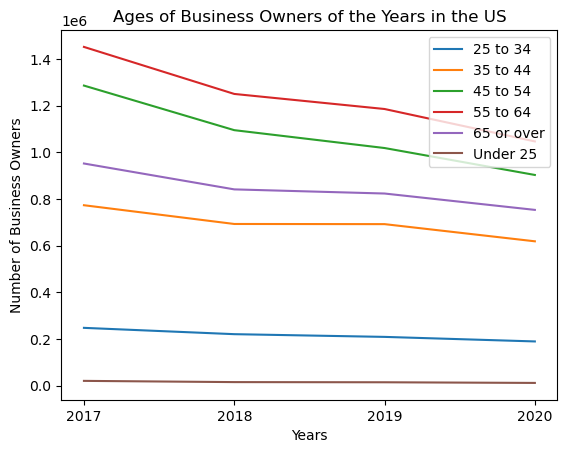

In [13]:


cols = [x for x in newdf.columns]
print(cols)

fig = px.line(newdf, x=newdf.index, y=cols,markers=True)

fig.update_layout(title='Ages of Business Owners of the Years in the US',
                   xaxis_title='Years',
                   yaxis_title='Number of Business Owners',
                   legend_title="Age groups")

fig.show()

plt.plot(newdf.index,newdf[cols])
plt.legend(cols,loc='upper right')
plt.xlabel("Years")
plt.ylabel("Number of Business Owners")
plt.title("Ages of Business Owners of the Years in the US")


plt.show()


